# The IMDB dataset

In [4]:
from keras.datasets import imdb

# train_data contains 10000 common words
# train_data, test_data -- reviews in films
# train_labels, test_labels -- list on ones and zeros --> positive and negative reviews

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17465344/17464789 [==============================] - 12s 1us/step


In [8]:
print(train_data[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [7]:
# decoding review

word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

print(decoded_review)

? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

# Prepare data

In [12]:
# list --> vector of 0 and 1

import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    
    result = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        result[i, sequence] = 1.
    return result

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [13]:
print(x_train[0])

[0. 1. 1. ... 0. 0. 0.]


In [15]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

# Building network

input -> Dense(16, relu) -> Dense(16, relu) -> Dense(1, sigmoid)

In [33]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [34]:
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [26]:
# setup optimizer

from keras import optimizers

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [28]:
# setup loss and metrics

from keras import losses
from keras import metrics

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
             loss=losses.binary_crossentropy,
             metrics=[metrics.binary_accuracy])

# Check decision

In [35]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [36]:
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['acc'])

In [37]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))


Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 159us/step - loss: 0.5199 - acc: 0.7847 - val_loss: 0.3847 - val_acc: 0.8749
Epoch 2/20
15000/15000 [==============================] - 2s 121us/step - loss: 0.3069 - acc: 0.9017 - val_loss: 0.3107 - val_acc: 0.8842
Epoch 3/20
15000/15000 [==============================] - 2s 123us/step - loss: 0.2218 - acc: 0.9284 - val_loss: 0.2872 - val_acc: 0.8864
Epoch 4/20
15000/15000 [==============================] - 2s 123us/step - loss: 0.1746 - acc: 0.9441 - val_loss: 0.3292 - val_acc: 0.8666
Epoch 5/20
15000/15000 [==============================] - 2s 122us/step - loss: 0.1419 - acc: 0.9552 - val_loss: 0.2956 - val_acc: 0.8830
Epoch 6/20
15000/15000 [==============================] - 2s 123us/step - loss: 0.1175 - acc: 0.9621 - val_loss: 0.2954 - val_acc: 0.8851
Epoch 7/20
15000/15000 [==============================] - 2s 122us/step - loss: 0.0955 - acc: 0.9719 - val_loss: 0.3206 -

In [39]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

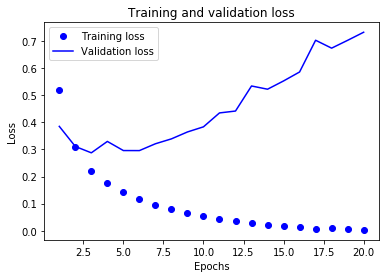

In [41]:
import matplotlib.pyplot as plt

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['acc']) + 1)

plt.plot(epochs, loss_values, 'bo', label = 'Training loss') # bo -- blue dot
plt.plot(epochs, val_loss_values, 'b', label = 'Validation loss') # b -- solid blue line
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

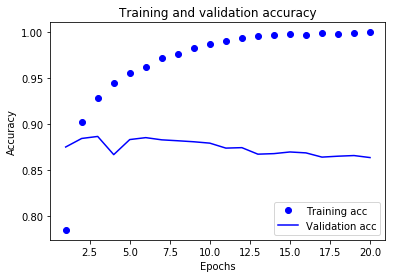

In [44]:
plt.clf()

acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc_values, 'bo', label = 'Training acc') # bo -- blue dot
plt.plot(epochs, val_acc_values, 'b', label = 'Validation acc') # b -- solid blue line
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

## Model overfitted! Training should stop on 4 epoch

# Retraining model

In [45]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [46]:
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['acc'])

In [47]:
history = model.fit(x_train,
                    y_train,
                    epochs=4,
                    batch_size=512)

Epoch 1/4
25000/25000 [==============================] - 2s 98us/step - loss: 0.4709 - acc: 0.8255
Epoch 2/4
25000/25000 [==============================] - 2s 88us/step - loss: 0.2698 - acc: 0.9087
Epoch 3/4
25000/25000 [==============================] - 2s 87us/step - loss: 0.2062 - acc: 0.9294
Epoch 4/4
25000/25000 [==============================] - 2s 83us/step - loss: 0.1724 - acc: 0.9398


In [48]:
results = model.evaluate(x_test, y_test)

25000/25000 [==============================] - 2s 85us/step


In [50]:
results

[0.29043662611961363, 0.8845599889755249]

# Predictions on new data

In [51]:
model.predict(x_test)

array([[0.1580171 ],
       [0.9982023 ],
       [0.90183324],
       ...,
       [0.09530544],
       [0.07519108],
       [0.57431394]], dtype=float32)